In [17]:
import pandas as pd
import re
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Data/new_train.csv')
data.head()

,tweet_id,tweet,sentiment,tweet_len_noisy
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,learning ab google doodles! all doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,this iphone #sxsw app would b pretty awesome i...,0,125
4,3604,line outside the apple store in austin waiting...,1,77


In [5]:
data.shape

(7273, 4)

In [6]:
def identify_urls(tweet):
    """
    This is a function that will search for URLs withing a string. It returns the URL part if there is any or it will
    return 'No URL'
    """
    
    regex = r'('

    # Scheme (HTTP, HTTPS, FTP and SFTP):
    regex += r'(?:(https?|s?ftp):\/\/)?'

    # www:
    regex += r'(?:www\.)?'

    regex += r'('

    # Host and domain (including ccSLD):
    regex += r'(?:(?:[A-Z0-9][A-Z0-9-]{0,61}[A-Z0-9]\.)+)'

    # TLD:
    regex += r'([A-Z]{2,6})'

    # IP Address:
    regex += r'|(?:\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})'

    regex += r')'

    # Port:
    regex += r'(?::(\d{1,5}))?'

    # Query path:
    regex += r'(?:(\/\S+)*)'

    regex += r')'
    
    #searching for URLs in the tweet
    find_urls_in_string = re.compile(regex, re.IGNORECASE)
    url = find_urls_in_string.search(tweet)
    
    if url is not None and url.group(0) is not None:
        return url.group(0).strip()
    else:
        return "No URL"

In [7]:
data['URL'] = data['tweet'].apply(lambda x: identify_urls(x))

In [8]:
data['URL'].value_counts()

No URL                           7142
webdoc.com                          8
bit.ly/g03mzb                       8
actsofsharing.com                   5
rww.to/f6bcet                       5
                                 ... 
bit.ly/ajs2011                      1
sxsurrogates.com                    1
freebeernear.me                     1
www.socialmediabum.tumblr.com       1
satesman.com                        1
Name: URL, Length: 92, dtype: int64

### We have extracted the URLs from the tweets. There are some wrong values still present in our new column which can be removed separately. We can say that ATLEAST 7142(98%) tweets for sure did not had any URLs.

In [9]:
url_data = data[data['URL'] != 'No URL']

In [10]:
url_data.head()

,tweet_id,tweet,sentiment,tweet_len_noisy,URL
10,6398,rt official #sxsw app û÷sxsw goûª bit.ly/hm...,3,81,bit.ly/hmiiga
146,7302,setting up for the google #gsdm #sxsw party. ...,2,127,sxsurrogates.com
215,4236,4 most valuable apple ipad apps; top critical ...,1,104,uber.la
218,7102,apple is opening up a temporary store in downt...,1,117,statesman.com
244,74,ha.ha. rt #sxsw news: yahoo.com is loosing se...,1,134,ha.ha


In [11]:
#cleaning the URLs data separately to find insights

url_data['URL_tokenized'] = url_data['URL'].apply(lambda x: x.lower().split('.'))

In [12]:
url_data.head(10)

,tweet_id,tweet,sentiment,tweet_len_noisy,URL,URL_tokenized
10,6398,rt official #sxsw app û÷sxsw goûª bit.ly/hm...,3,81,bit.ly/hmiiga,"[bit, ly/hmiiga]"
146,7302,setting up for the google #gsdm #sxsw party. ...,2,127,sxsurrogates.com,"[sxsurrogates, com]"
215,4236,4 most valuable apple ipad apps; top critical ...,1,104,uber.la,"[uber, la]"
218,7102,apple is opening up a temporary store in downt...,1,117,statesman.com,"[statesman, com]"
244,74,ha.ha. rt #sxsw news: yahoo.com is loosing se...,1,134,ha.ha,"[ha, ha]"
260,6952,rt win free ipad 2 from webdoc.com #sxsw rt,1,52,webdoc.com,"[webdoc, com]"
320,3855,"is biyt.ly for email, like google voice for e...",3,84,biyt.ly,"[biyt, ly]"
388,7020,6th and congress. dude is creatively saving up...,2,105,www.socialmediabum.tumblr.com,"[www, socialmediabum, tumblr, com]"
453,1127,for those that can't wait. 6th and congress ge...,1,132,tcrn.ch/eb5fjs,"[tcrn, ch/eb5fjs]"
468,1549,google to launch major new social network c...,1,103,rww.to/f6bcet,"[rww, to/f6bcet]"


In [13]:
words_to_remove = ["www", "com", "http", "https", "ly", "org"]

url_data['URL_tokenized'] = url_data['URL_tokenized'].apply(lambda x: [w for w in x if w not in words_to_remove])

In [14]:
url_data.head(10)

,tweet_id,tweet,sentiment,tweet_len_noisy,URL,URL_tokenized
10,6398,rt official #sxsw app û÷sxsw goûª bit.ly/hm...,3,81,bit.ly/hmiiga,"[bit, ly/hmiiga]"
146,7302,setting up for the google #gsdm #sxsw party. ...,2,127,sxsurrogates.com,[sxsurrogates]
215,4236,4 most valuable apple ipad apps; top critical ...,1,104,uber.la,"[uber, la]"
218,7102,apple is opening up a temporary store in downt...,1,117,statesman.com,[statesman]
244,74,ha.ha. rt #sxsw news: yahoo.com is loosing se...,1,134,ha.ha,"[ha, ha]"
260,6952,rt win free ipad 2 from webdoc.com #sxsw rt,1,52,webdoc.com,[webdoc]
320,3855,"is biyt.ly for email, like google voice for e...",3,84,biyt.ly,[biyt]
388,7020,6th and congress. dude is creatively saving up...,2,105,www.socialmediabum.tumblr.com,"[socialmediabum, tumblr]"
453,1127,for those that can't wait. 6th and congress ge...,1,132,tcrn.ch/eb5fjs,"[tcrn, ch/eb5fjs]"
468,1549,google to launch major new social network c...,1,103,rww.to/f6bcet,"[rww, to/f6bcet]"


In [15]:
def generate_wordcloud(dataframe, col_name, title):
    
    wordcloud = WordCloud().generate(dataframe[col_name].to_string())

    # Display the generated image:
    plt.figure(figsize=(15,8))
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

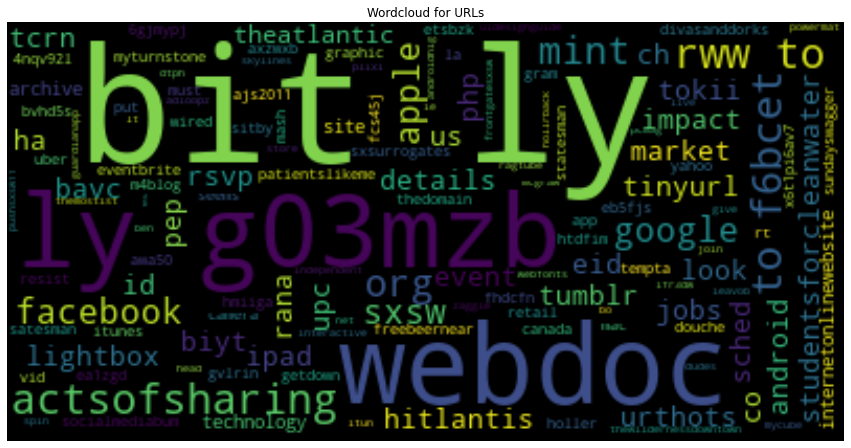

In [18]:
generate_wordcloud(url_data, 'URL_tokenized', 'Wordcloud for URLs')